In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
import pandas as pd
import numpy as np

In [2]:
sub_list = ['Subject001',
           'Subject002',
           'Subject003',
           'Subject004',
           'Subject005',
           'Subject006',
           'Subject007',
           'Subject008',
           'Subject009',
           'Subject010',
           'Subject011']

In [3]:
age= [64,
     59,
     75,
     63,
     72,
     82,
     67,
     67,
     67,
     68,
     61]

## the first 3 scans have to be removed due to poor data quality

In [4]:
age = age[3:]

In [5]:
duration_implant = [np.nan,
                   5.05,
                   7.08,
                   4,
                   12.1,
                   6.85,
                   13.7,
                   9.3,
                   3.66,
                   2.05,
                   9.75]

In [6]:
duration_implant = duration_implant[3:]

In [7]:
cond_list = ['Condition002', 'Condition003']

In [8]:
epi_filenames = pd.read_excel('epi_filenames.xlsx')

In [9]:
tsnr_schaeffer_df = pd.read_csv('/Users/alexbarnett/Documents/DBS_theta_burst/epis/tsnr_results/tsnr_schaeffer_df.csv')

In [10]:
# Extract numerical identifiers from the 'file' column in df1
tsnr_schaeffer_df["identifier"] = tsnr_schaeffer_df["file"].str.extract(r'(\d{14})').astype(int)

In [11]:
# Merge df1 with df2 on the 'identifier' column
tsnr_schaeffer_df_merged = pd.merge(tsnr_schaeffer_df, epi_filenames, on="identifier", how="left")

In [12]:
roi_list = pd.read_csv('Schaefer2018_200Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv')

In [13]:
index_network = []
index_network.append(0)
for i in range(1,np.size(roi_list['network'])):
    if roi_list['network'][i] == roi_list['network'][i-1]:
        index_network.append(0)
    else:
        index_network.append(1)

In [14]:
network_boundaries = np.where(np.array(index_network)==1)

In [15]:
roi_order = roi_list['ROI Label'].values

In [16]:
roi_order = roi_order-1

In [17]:
tsnr_schaeffer_df

Unnamed: 0                                               file  roi  \
0              0  wrEP2D_BOLD_MOCO_P2_3MM_0002_ep2d_bold_moco_p2...    1   
1              1  wrEP2D_BOLD_MOCO_P2_3MM_0002_ep2d_bold_moco_p2...    2   
2              2  wrEP2D_BOLD_MOCO_P2_3MM_0002_ep2d_bold_moco_p2...    3   
3              3  wrEP2D_BOLD_MOCO_P2_3MM_0002_ep2d_bold_moco_p2...    4   
4              4  wrEP2D_BOLD_MOCO_P2_3MM_0002_ep2d_bold_moco_p2...    5   
...          ...                                                ...  ...   
3995        3995  wrep2d_bold_moco_p2_3mm_ep2d_bold_moco_p2_3mm_...  196   
3996        3996  wrep2d_bold_moco_p2_3mm_ep2d_bold_moco_p2_3mm_...  197   
3997        3997  wrep2d_bold_moco_p2_3mm_ep2d_bold_moco_p2_3mm_...  198   
3998        3998  wrep2d_bold_moco_p2_3mm_ep2d_bold_moco_p2_3mm_...  199   
3999        3999  wrep2d_bold_moco_p2_3mm_ep2d_bold_moco_p2_3mm_...  200   

           tsnr      identifier  
0      0.061938  20220601102702  
1      0.000000  20220601102702  
2      0.243999  20220601102702  
3      0.000000  20220601102702  
4      0.000000  20220601102702  
...         ...             ...  
3995  66.775960  20241009102859  
3996  70.175700  20241009102859  
3997  57.575768  20241009102859  
3998  69.760090  20241009102859  
3999  60.830320  20241009102859  

[4000 rows x 5 columns]

In [18]:
data = loadmat('resultsROI_'+sub_list[0]+'_'+cond_list[0]+'.mat')

In [19]:
matrix_z = data['Z']

In [20]:
matrix_z = matrix_z[-200:,-203:-3]

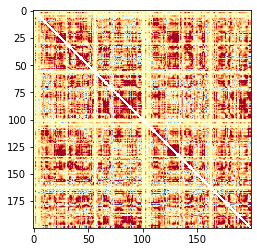

In [21]:
plt.imshow(matrix_z,interpolation=None,vmax = .4,vmin = -.4,cmap='RdYlBu_r')

In [22]:
temp_tsnr = tsnr_schaeffer_df_merged.loc[tsnr_schaeffer_df_merged['CONN_name']=='Subject001'].reset_index()

In [23]:
temp_tsnr_avg = temp_tsnr.groupby('roi').mean().reset_index()

In [24]:
temp_tsnr_avg

roi  index  Unnamed: 0       tsnr    identifier
0      1  200.0       200.0   0.060420  2.022060e+13
1      2  201.0       201.0   0.000000  2.022060e+13
2      3  202.0       202.0   0.186609  2.022060e+13
3      4  203.0       203.0   0.000000  2.022060e+13
4      5  204.0       204.0   0.000000  2.022060e+13
..   ...    ...         ...        ...           ...
195  196  395.0       395.0  29.741664  2.022060e+13
196  197  396.0       396.0  35.605694  2.022060e+13
197  198  397.0       397.0  24.979141  2.022060e+13
198  199  398.0       398.0  34.877286  2.022060e+13
199  200  399.0       399.0  36.367145  2.022060e+13

[200 rows x 5 columns]

In [25]:
temp_tsnr_value = temp_tsnr['tsnr'][0:200].values

In [26]:
np.where(temp_tsnr_value<10)

(array([  0,   1,   2,   3,   4,   6,   8,  10,  30,  31,  56,  57,  58,
         63,  73,  74,  99, 100, 101, 102, 103, 104, 105, 107, 110, 123,
        134, 136, 148, 149, 158, 159, 161, 162, 163, 164, 167, 184, 185,
        187]),)

In [27]:
index = np.where(temp_tsnr_value<10)[0]

In [28]:
matrix_z[index,:]= np.nan
matrix_z[:,index]=np.nan

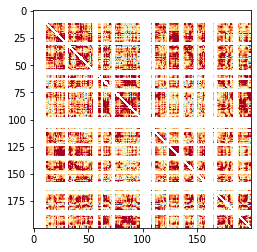

In [29]:
plt.imshow(matrix_z,interpolation=None,vmax = .4,vmin = -.4,cmap='RdYlBu_r')

In [30]:
matrix_z_schaeffer=[]
num_censored = []
for cond in range(len(cond_list)):
    for sub in range(len(sub_list)):
        # Load the .mat file
        data = loadmat('resultsROI_'+sub_list[sub]+'_'+cond_list[cond]+'.mat')
        matrix_z = data['Z']
        matrix_z = matrix_z[-200:,-203:-3]
        temp_tsnr = tsnr_schaeffer_df_merged.loc[tsnr_schaeffer_df_merged['CONN_name']==sub_list[sub]].reset_index()
        temp_tsnr_avg = temp_tsnr.groupby('roi').mean().reset_index()
        index = np.where(temp_tsnr_avg<10)[0]
        num_censored.append(np.size(index))
        matrix_z[index,:]= np.nan
        matrix_z[:,index]=np.nan
        matrix_z = matrix_z[np.ix_(roi_order,roi_order)]
        matrix_z_schaeffer.append(matrix_z)

In [31]:
num_censored

[51,
 54,
 39,
 0,
 28,
 20,
 16,
 15,
 19,
 13,
 33,
 51,
 54,
 39,
 0,
 28,
 20,
 16,
 15,
 19,
 13,
 33]

In [32]:
tsnr_schaeffer_df_merged

Unnamed: 0                                               file  roi  \
0              0  wrEP2D_BOLD_MOCO_P2_3MM_0002_ep2d_bold_moco_p2...    1   
1              1  wrEP2D_BOLD_MOCO_P2_3MM_0002_ep2d_bold_moco_p2...    2   
2              2  wrEP2D_BOLD_MOCO_P2_3MM_0002_ep2d_bold_moco_p2...    3   
3              3  wrEP2D_BOLD_MOCO_P2_3MM_0002_ep2d_bold_moco_p2...    4   
4              4  wrEP2D_BOLD_MOCO_P2_3MM_0002_ep2d_bold_moco_p2...    5   
...          ...                                                ...  ...   
3995        3995  wrep2d_bold_moco_p2_3mm_ep2d_bold_moco_p2_3mm_...  196   
3996        3996  wrep2d_bold_moco_p2_3mm_ep2d_bold_moco_p2_3mm_...  197   
3997        3997  wrep2d_bold_moco_p2_3mm_ep2d_bold_moco_p2_3mm_...  198   
3998        3998  wrep2d_bold_moco_p2_3mm_ep2d_bold_moco_p2_3mm_...  199   
3999        3999  wrep2d_bold_moco_p2_3mm_ep2d_bold_moco_p2_3mm_...  200   

           tsnr      identifier  \
0      0.061938  20220601102702   
1      0.000000  20220601102702   
2      0.243999  20220601102702   
3      0.000000  20220601102702   
4      0.000000  20220601102702   
...         ...             ...   
3995  66.775960  20241009102859   
3996  70.175700  20241009102859   
3997  57.575768  20241009102859   
3998  69.760090  20241009102859   
3999  60.830320  20241009102859   

                                          DBS epi files    Unnamed: 1  \
0     DBSSTIM_S002/DARRIN_LEE_PD_BRAIN_STIM_20220601...  DBSSTIM_S002   
1     DBSSTIM_S002/DARRIN_LEE_PD_BRAIN_STIM_20220601...  DBSSTIM_S002   
2     DBSSTIM_S002/DARRIN_LEE_PD_BRAIN_STIM_20220601...  DBSSTIM_S002   
3     DBSSTIM_S002/DARRIN_LEE_PD_BRAIN_STIM_20220601...  DBSSTIM_S002   
4     DBSSTIM_S002/DARRIN_LEE_PD_BRAIN_STIM_20220601...  DBSSTIM_S002   
...                                                 ...           ...   
3995  DBSSTIM_S00D/ep2d_bold_moco_p2_3mm/swrep2d_bol...  DBSSTIM_S00D   
3996  DBSSTIM_S00D/ep2d_bold_moco_p2_3mm/swrep2d_bol...  DBSSTIM_S00D   
3997  DBSSTIM_S00D/ep2d_bold_moco_p2_3mm/swrep2d_bol...  DBSSTIM_S00D   
3998  DBSSTIM_S00D/ep2d_bold_moco_p2_3mm/swrep2d_bol...  DBSSTIM_S00D   
3999  DBSSTIM_S00D/ep2d_bold_moco_p2_3mm/swrep2d_bol...  DBSSTIM_S00D   

       CONN_name  
0     Subject001  
1     Subject001  
2     Subject001  
3     Subject001  
4     Subject001  
...          ...  
3995  Subject010  
3996  Subject010  
3997  Subject010  
3998  Subject010  
3999  Subject010  

[4000 rows x 8 columns]

In [33]:
np.shape(data['Z'])

(366, 369)

In [34]:
data['names'][0][-200:]

array([array(['Schaefer.cluster001'], dtype='<U19'),
       array(['Schaefer.cluster002'], dtype='<U19'),
       array(['Schaefer.cluster003'], dtype='<U19'),
       array(['Schaefer.cluster004'], dtype='<U19'),
       array(['Schaefer.cluster005'], dtype='<U19'),
       array(['Schaefer.cluster006'], dtype='<U19'),
       array(['Schaefer.cluster007'], dtype='<U19'),
       array(['Schaefer.cluster008'], dtype='<U19'),
       array(['Schaefer.cluster009'], dtype='<U19'),
       array(['Schaefer.cluster010'], dtype='<U19'),
       array(['Schaefer.cluster011'], dtype='<U19'),
       array(['Schaefer.cluster012'], dtype='<U19'),
       array(['Schaefer.cluster013'], dtype='<U19'),
       array(['Schaefer.cluster014'], dtype='<U19'),
       array(['Schaefer.cluster015'], dtype='<U19'),
       array(['Schaefer.cluster016'], dtype='<U19'),
       array(['Schaefer.cluster017'], dtype='<U19'),
       array(['Schaefer.cluster018'], dtype='<U19'),
       array(['Schaefer.cluster019'], dtype='<

In [35]:
data['names2'][0][-203:-3]

array([array(['Schaefer.cluster001'], dtype='<U19'),
       array(['Schaefer.cluster002'], dtype='<U19'),
       array(['Schaefer.cluster003'], dtype='<U19'),
       array(['Schaefer.cluster004'], dtype='<U19'),
       array(['Schaefer.cluster005'], dtype='<U19'),
       array(['Schaefer.cluster006'], dtype='<U19'),
       array(['Schaefer.cluster007'], dtype='<U19'),
       array(['Schaefer.cluster008'], dtype='<U19'),
       array(['Schaefer.cluster009'], dtype='<U19'),
       array(['Schaefer.cluster010'], dtype='<U19'),
       array(['Schaefer.cluster011'], dtype='<U19'),
       array(['Schaefer.cluster012'], dtype='<U19'),
       array(['Schaefer.cluster013'], dtype='<U19'),
       array(['Schaefer.cluster014'], dtype='<U19'),
       array(['Schaefer.cluster015'], dtype='<U19'),
       array(['Schaefer.cluster016'], dtype='<U19'),
       array(['Schaefer.cluster017'], dtype='<U19'),
       array(['Schaefer.cluster018'], dtype='<U19'),
       array(['Schaefer.cluster019'], dtype='<

In [36]:
# Access a specific variable (e.g., 'variable_name')
names = data['names']


In [37]:
matrix_z_schaeffer_cond2 = matrix_z_schaeffer[0:11]

In [38]:
matrix_z_schaeffer_cond2 = matrix_z_schaeffer_cond2[3:]

In [39]:
matrix_z_schaeffer_cond3 = matrix_z_schaeffer[-11:]

In [40]:
matrix_z_schaeffer_cond3 = matrix_z_schaeffer_cond3[3:]

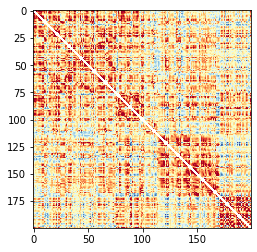

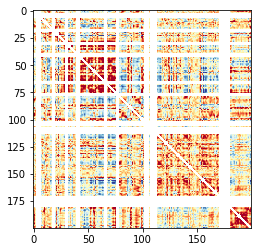

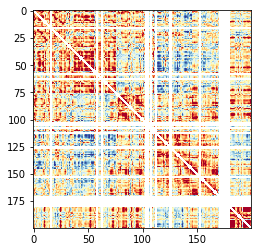

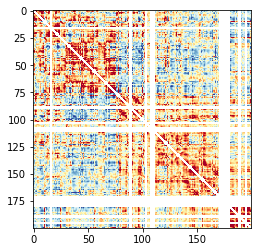

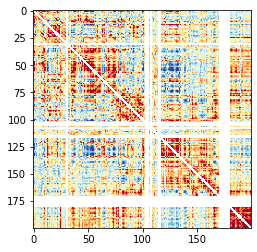

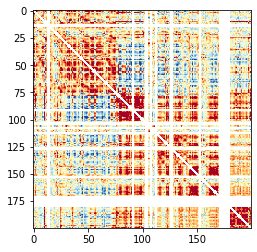

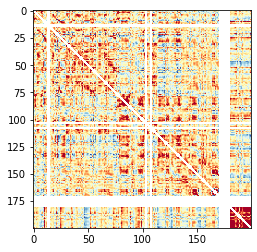

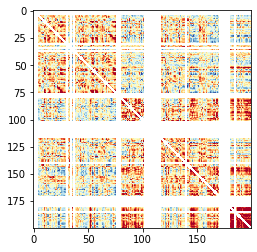

In [41]:
for sub in range(8):
    plt.figure()
    plt.imshow(matrix_z_schaeffer_cond2[sub],interpolation=None,vmax = .5,vmin = -.5,cmap='RdYlBu_r')

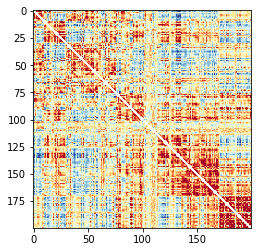

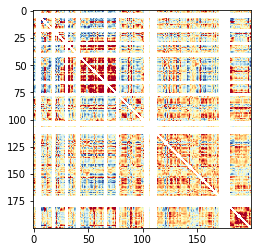

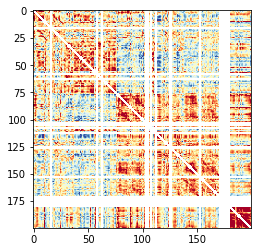

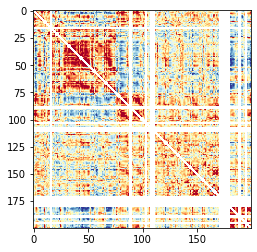

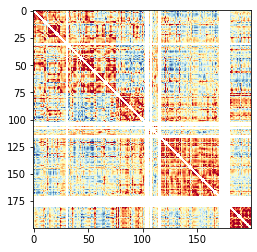

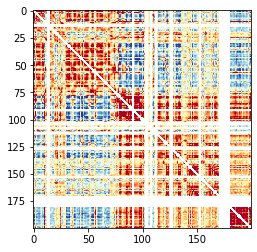

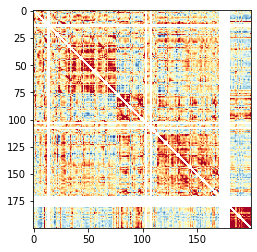

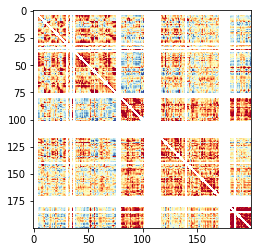

In [42]:
for sub in range(8):
    plt.figure()
    plt.imshow(matrix_z_schaeffer_cond3[sub],interpolation=None,vmax = .5,vmin = -.5,cmap='RdYlBu_r')

In [43]:
for boundary in network_boundaries[0]:
    print(boundary)

30
76
102
114
136
171


/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


([], [])

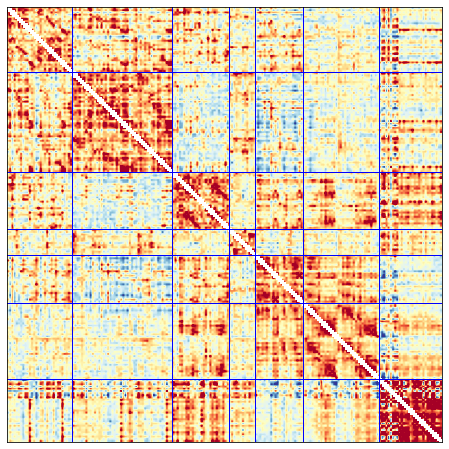

In [44]:
plt.figure(figsize=(8, 8))
plt.imshow(np.nanmean(matrix_z_schaeffer_cond2,0),interpolation=None,vmax = .4,vmin = -.4,cmap='RdYlBu_r')
# Add grid lines for network boundaries
for boundary in network_boundaries[0]:
    plt.axhline(boundary - 0.5, color='blue', linestyle='-', linewidth=1)  # Horizontal lines
    plt.axvline(boundary - 0.5, color='blue', linestyle='-', linewidth=1)  # Vertical lines
# Optional: Remove ticks completely
plt.tick_params(axis='both', which='both', length=0)
# Remove tick labels
plt.xticks([])  # Remove x-axis tick labels
plt.yticks([])  # Remove y-axis tick labels

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


([], [])

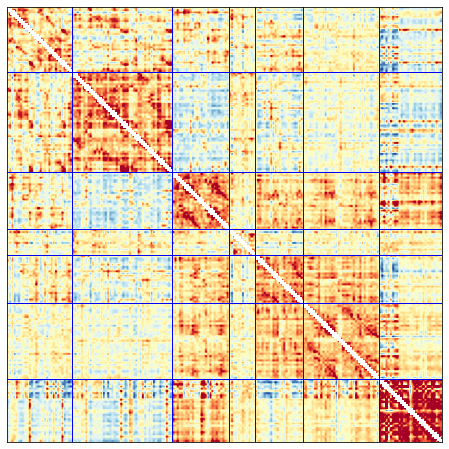

In [45]:
plt.figure(figsize=(8, 8))
plt.imshow(np.nanmean(matrix_z_schaeffer_cond3,0),interpolation=None,vmax = .5,vmin = -.5,cmap='RdYlBu_r')
# Add grid lines for network boundaries
for boundary in network_boundaries[0]:
    plt.axhline(boundary - 0.5, color='blue', linestyle='-', linewidth=1)  # Horizontal lines
    plt.axvline(boundary - 0.5, color='blue', linestyle='-', linewidth=1)  # Vertical lines
# Optional: Remove ticks completely
plt.tick_params(axis='both', which='both', length=0)
# Remove tick labels
plt.xticks([])  # Remove x-axis tick labels
plt.yticks([])  # Remove y-axis tick labels


/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


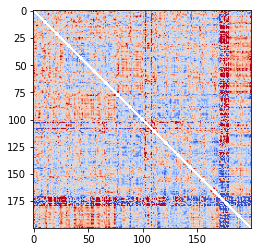

In [46]:
plt.imshow(np.nanmean(matrix_z_schaeffer_cond2,0) - np.nanmean(matrix_z_schaeffer_cond3,0),interpolation=None,vmax = .2,vmin = -.2,cmap='coolwarm') 

In [47]:
matrix_z_schaeffer_diff = np.array(matrix_z_schaeffer_cond2) - np.array(matrix_z_schaeffer_cond3)

In [48]:
matrix_z_schaeffer_t = np.mean(matrix_z_schaeffer_diff,0)/ (np.std(matrix_z_schaeffer_diff,0)/np.sqrt(np.shape(matrix_z_schaeffer_diff)[0]))

In [49]:
network_list = roi_list['network'].unique()

In [50]:
age

[63, 72, 82, 67, 67, 67, 68, 61]

In [51]:
net_to_net_FC = []
net1_label = []
net2_label = []
sub_label = []
condition_label = []
age_tracker = []
duration_tracker = []
for sub in range(8):
    for net1 in range(len(network_list)):
        for net2 in range(len(network_list)):
            if net1<=net2 :
                first_index_1= np.where(roi_list['network'] == network_list[net1])[0][0]
                last_index_1 = np.where(roi_list['network'] == network_list[net1])[0][-1]
                first_index_2= np.where(roi_list['network'] == network_list[net2])[0][0]
                last_index_2 = np.where(roi_list['network'] == network_list[net2])[0][-1]

                net_to_net_FC.append(np.nanmean(matrix_z_schaeffer_cond2[sub][first_index_1:last_index_1,first_index_2:last_index_2]))
                net1_label.append(network_list[net1])
                net2_label.append(network_list[net2])
                sub_label.append(sub)
                condition_label.append(2) 
                age_tracker.append(age[sub])
                duration_tracker.append(duration_implant[sub])

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice


In [52]:
for sub in range(8):
    for net1 in range(len(network_list)):
        for net2 in range(len(network_list)):
            if net1<=net2 :
                first_index_1= np.where(roi_list['network'] == network_list[net1])[0][0]
                last_index_1 = np.where(roi_list['network'] == network_list[net1])[0][-1]
                first_index_2= np.where(roi_list['network'] == network_list[net2])[0][0]
                last_index_2 = np.where(roi_list['network'] == network_list[net2])[0][-1]

                net_to_net_FC.append(np.nanmean(matrix_z_schaeffer_cond3[sub][first_index_1:last_index_1,first_index_2:last_index_2]))
                net1_label.append(network_list[net1])
                net2_label.append(network_list[net2])
                sub_label.append(sub)
                condition_label.append(3)  
                age_tracker.append(age[sub])
                duration_tracker.append(duration_implant[sub])

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


In [53]:
fc_z_data = np.array([sub_label,net1_label,net2_label,net_to_net_FC,condition_label,age_tracker,duration_tracker]).T
columns = ['subject','net1_label','net2_label','net_to_net_FC','condition','age','duration_implant']
fc_z_df = pd.DataFrame(data = fc_z_data, columns = columns)
fc_z_df['net_to_net_FC'] = fc_z_df['net_to_net_FC'].astype('float')
fc_z_df['age'] = fc_z_df['age'].astype('float')
fc_z_df['duration_implant'] = fc_z_df['duration_implant'].astype('float')

In [54]:
import statsmodels.formula.api as smf

In [55]:
network_list[net1]

'Vis'

In [56]:
network_list

array(['Cont', 'Default', 'DorsAttn', 'Limbic', 'SalVentAttn', 'SomMot',
       'Vis'], dtype=object)

In [57]:
7*7

49

In [58]:
t_values_condition = []
p_values_condition = []
net1_tracker = []
net2_tracker = []
for net1 in range(len(network_list)):
    for net2 in range(len(network_list)):
        if net1<=net2 :
            md = smf.mixedlm("net_to_net_FC~condition+duration_implant+age", 
                             data = fc_z_df.dropna(subset=['net_to_net_FC']).loc[fc_z_df['net1_label']==network_list[net1]].loc[fc_z_df['net2_label']==network_list[net2]],
                             groups = 'subject',
                            re_formula='~condition')
            mdf = md.fit()
            t_values_condition.append(mdf.tvalues[1])
            p_values_condition.append(mdf.pvalues[1])
            net1_tracker.append(network_list[net1])
            net2_tracker.append(network_list[net2])
            print(mdf.summary())


/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)


                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     net_to_net_FC
No. Observations:     16          Method:                 REML         
No. Groups:           8           Scale:                  0.0017       
Min. group size:      2           Log-Likelihood:         11.2140      
Max. group size:      2           Converged:              Yes          
Mean group size:      2.0                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.085    0.139  0.607 0.544 -0.188  0.358
condition[T.3]               -0.021    0.025 -0.858 0.391 -0.070  0.027
duration_implant              0.000    0.003  0.038 0.970 -0.006  0.006
age                           0.001    0.002  0.556 0.578 -0.003  0.005
subject V

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization faile

                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     net_to_net_FC
No. Observations:     16          Method:                 REML         
No. Groups:           8           Scale:                  0.0003       
Min. group size:      2           Log-Likelihood:         14.8628      
Max. group size:      2           Converged:              No           
Mean group size:      2.0                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.046    0.132  0.347 0.729 -0.212  0.304
condition[T.3]               -0.019    0.015 -1.237 0.216 -0.049  0.011
duration_implant             -0.000    0.003 -0.020 0.984 -0.006  0.006
age                           0.000    0.002  0.044 0.965 -0.004  0.004
subject V

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization f

                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     net_to_net_FC
No. Observations:     16          Method:                 REML         
No. Groups:           8           Scale:                  0.0008       
Min. group size:      2           Log-Likelihood:         12.9613      
Max. group size:      2           Converged:              No           
Mean group size:      2.0                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                    -0.148    0.126 -1.176 0.240 -0.394  0.099
condition[T.3]               -0.035    0.021 -1.685 0.092 -0.076  0.006
duration_implant              0.001    0.003  0.302 0.762 -0.005  0.007
age                           0.002    0.002  1.050 0.294 -0.002  0.005
subject V

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with cg

                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     net_to_net_FC
No. Observations:     16          Method:                 REML         
No. Groups:           8           Scale:                  0.0003       
Min. group size:      2           Log-Likelihood:         14.7787      
Max. group size:      2           Converged:              No           
Mean group size:      2.0                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.037    0.163  0.227 0.820 -0.283  0.357
condition[T.3]               -0.047    0.013 -3.575 0.000 -0.073 -0.021
duration_implant              0.001    0.004  0.317 0.751 -0.006  0.008
age                          -0.001    0.002 -0.514 0.607 -0.006  0.003
subject V

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     net_to_net_FC
No. Observations:     16          Method:                 REML         
No. Groups:           8           Scale:                  0.0014       
Min. group size:      2           Log-Likelihood:         9.3443       
Max. group size:      2           Converged:              Yes          
Mean group size:      2.0                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                    -0.160    0.221 -0.724 0.469 -0.594  0.274
condition[T.3]               -0.069    0.023 -3.011 0.003 -0.114 -0.024
duration_implant              0.001    0.005  0.206 0.837 -0.009  0.011
age                           0.002    0.003  0.779 0.436 -0.004  0.009
subject V

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     net_to_net_FC
No. Observations:     16          Method:                 REML         
No. Groups:           8           Scale:                  0.0004       
Min. group size:      2           Log-Likelihood:         15.4958      
Max. group size:      2           Converged:              Yes          
Mean group size:      2.0                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.118    0.230  0.511 0.609 -0.334  0.569
condition[T.3]                0.025    0.010  2.570 0.010  0.006  0.044
duration_implant             -0.002    0.005 -0.448 0.654 -0.012  0.007
age                          -0.000    0.003 -0.070 0.944 -0.007  0.006
subject V

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     net_to_net_FC
No. Observations:     16          Method:                 REML         
No. Groups:           8           Scale:                  0.0009       
Min. group size:      2           Log-Likelihood:         12.5192      
Max. group size:      2           Converged:              Yes          
Mean group size:      2.0                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                    -0.048    0.185 -0.258 0.797 -0.410  0.314
condition[T.3]                0.001    0.017  0.080 0.936 -0.032  0.034
duration_implant              0.003    0.004  0.757 0.449 -0.005  0.012
age                           0.000    0.003  0.186 0.852 -0.005  0.006
subject V

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/

                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     net_to_net_FC
No. Observations:     16          Method:                 REML         
No. Groups:           8           Scale:                  0.0003       
Min. group size:      2           Log-Likelihood:         9.1630       
Max. group size:      2           Converged:              No           
Mean group size:      2.0                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.435    0.344  1.263 0.206 -0.240  1.109
condition[T.3]               -0.012    0.034 -0.351 0.725 -0.079  0.055
duration_implant             -0.001    0.003 -0.306 0.759 -0.008  0.005
age                          -0.006    0.005 -1.195 0.232 -0.015  0.004
subject V

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     net_to_net_FC
No. Observations:     16          Method:                 REML         
No. Groups:           8           Scale:                  0.0011       
Min. group size:      2           Log-Likelihood:         14.1139      
Max. group size:      2           Converged:              Yes          
Mean group size:      2.0                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.239    0.101  2.363 0.018  0.041  0.437
condition[T.3]                0.028    0.021  1.341 0.180 -0.013  0.068
duration_implant             -0.004    0.002 -1.978 0.048 -0.009 -0.000
age                          -0.001    0.001 -0.831 0.406 -0.004  0.002
subject V

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [121]:
# Create an empty 7x7 matrix
matrix = np.zeros((7, 7))

In [122]:
# Get upper triangular indices
rows, cols = np.triu_indices(7)

# Fill the lower triangular part with your vector values
matrix[rows, cols] = t_values_condition
# Mirror the upper triangle to the lower triangle (excluding the diagonal)
matrix[cols, rows] = matrix[rows, cols]  # Copies upper triangle to lower triangle


In [123]:
matrix

array([[-0.85831244, -1.18063983, -1.23704981, -0.80853543, -0.77233197,
         0.9404808 , -1.68534357],
       [-1.18063983,  1.37564219, -3.57455607, -1.45136243,  0.48739951,
        -0.0807897 , -3.01097793],
       [-1.23704981, -3.57455607,  2.11580768,  0.59067515,  3.04263499,
         2.56979727,  1.52169274],
       [-0.80853543, -1.45136243,  0.59067515, -2.14343026, -0.0824621 ,
         0.08049991, -0.35135332],
       [-0.77233197,  0.48739951,  3.04263499, -0.0824621 ,  0.49218756,
         1.34110397,  1.33249393],
       [ 0.9404808 , -0.0807897 ,  2.56979727,  0.08049991,  1.34110397,
         0.43099105, -0.28255818],
       [-1.68534357, -3.01097793,  1.52169274, -0.35135332,  1.33249393,
        -0.28255818,  1.24447275]])

In [158]:
sns.set_theme('talk')
sns.set(font_scale=1.2)
sns.set_style('ticks')
plt.figure(figsize=(5, 5))


# Create a mask for the upper triangular part
mask = np.triu(np.ones_like(matrix, dtype=bool), k=1)

# Apply the mask (set upper values to NaN so they won't be plotted)
matrix_masked = np.where(mask, np.nan, matrix)


# Plot heatmap
fig, ax = plt.subplots()
cax = plt.imshow(matrix_masked, cmap="RdYlBu_r", interpolation="none",vmax=3,vmin=-3)
plt.colorbar()

# Overlay text with half values for lower triangle
for i in range(7):
    for j in range(i + 1):  # Only iterate over lower triangle
        value = matrix[i, j]  
        ax.text(j, i, f"{value:.1f}", ha="center", va="center", color='black')
        
# Customize x and y ticks
tick_positions = np.arange(7)  # Positions (0 to 6)
tick_labels = network_labels  # Custom labels

ax.set_xticks(tick_positions)
ax.set_yticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45)
ax.set_yticklabels(tick_labels)

sns.despine()


plt.savefig('t_test_matrix.tiff', format="tiff", dpi=300,bbox_inches="tight")
plt.close()

<Figure size 360x360 with 0 Axes>

In [157]:
network_labels = ['CONT','DMN','DAN','LIM','SAL','SOM-MOT','VIS']

In [105]:
t_values_condition

[-0.858312440262492,
 -1.1806398311761215,
 -1.2370498111194375,
 -0.8085354343808148,
 -0.7723319738370874,
 0.9404807998076115,
 -1.6853435690242846,
 1.3756421856723924,
 -3.574556073119342,
 -1.451362432573693,
 0.4873995125656803,
 -0.08078970179354075,
 -3.010977926912743,
 2.1158076757475834,
 0.5906751545532819,
 3.0426349866251465,
 2.5697972703216725,
 1.5216927376721099,
 -2.143430260655562,
 -0.08246209957598132,
 0.0804999147659917,
 -0.3513533243065247,
 0.49218755630233785,
 1.341103974588724,
 1.3324939333540458,
 0.43099105024534723,
 -0.2825581775876087,
 1.2444727477261253]

In [69]:
significant_connections_uncorr = np.where(np.array(p_values_condition)<.05)

In [70]:
significant_connections_uncorr

(array([ 8, 12, 13, 15, 16, 18]),)

In [303]:
from statsmodels.stats.multitest import multipletests

In [304]:
# Perform FDR correction (Benjamini-Hochberg method by default)
corrected_results = multipletests(p_values_condition, alpha=0.05, method='fdr_bh')

In [305]:
significant_connections = np.where(corrected_results[0]==True)

In [306]:
significant_connections

(array([ 8, 12, 15]),)

In [307]:
np.array(t_values_condition)[significant_connections[0]]

array([-3.57455607, -3.01097793,  3.04263499])

In [308]:
md = smf.mixedlm("net_to_net_FC~condition+duration_implant+age", 
                 data = fc_z_df.loc[fc_z_df['net1_label']=='Default'].loc[fc_z_df['net2_label']=='DorsAttn'],
                 groups = 'subject')
mdf = md.fit()
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: net_to_net_FC
No. Observations: 16      Method:             REML         
No. Groups:       8       Scale:              0.0007       
Min. group size:  2       Log-Likelihood:     12.9413      
Max. group size:  2       Converged:          Yes          
Mean group size:  2.0                                      
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         0.093    0.235  0.394 0.694 -0.368  0.554
condition[T.3]   -0.047    0.013 -3.586 0.000 -0.073 -0.021
duration_implant -0.004    0.005 -0.813 0.416 -0.014  0.006
age              -0.001    0.003 -0.418 0.676 -0.008  0.005
subject Var       0.003    0.104                           



/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [309]:
md = smf.mixedlm("net_to_net_FC~condition+duration_implant+age", 
                 data = fc_z_df.loc[fc_z_df['net1_label']=='Default'].loc[fc_z_df['net2_label']=='Vis'],
                 groups = 'subject',
                re_formula='~condition')
mdf = md.fit()
print(mdf.summary())

                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     net_to_net_FC
No. Observations:     16          Method:                 REML         
No. Groups:           8           Scale:                  0.0014       
Min. group size:      2           Log-Likelihood:         9.3443       
Max. group size:      2           Converged:              Yes          
Mean group size:      2.0                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                    -0.160    0.221 -0.724 0.469 -0.594  0.274
condition[T.3]               -0.069    0.023 -3.011 0.003 -0.114 -0.024
duration_implant              0.001    0.005  0.206 0.837 -0.009  0.011
age                           0.002    0.003  0.779 0.436 -0.004  0.009
subject V

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [310]:
md = smf.mixedlm("net_to_net_FC~condition+duration_implant+age", 
                 data = fc_z_df.loc[fc_z_df['net1_label']=='DorsAttn'].loc[fc_z_df['net2_label']=='SalVentAttn'],
                 groups = 'subject',
                re_formula='~condition')
mdf = md.fit()
print(mdf.summary())

                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     net_to_net_FC
No. Observations:     16          Method:                 REML         
No. Groups:           8           Scale:                  0.0008       
Min. group size:      2           Log-Likelihood:         12.1500      
Max. group size:      2           Converged:              Yes          
Mean group size:      2.0                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.189    0.207  0.917 0.359 -0.215  0.594
condition[T.3]                0.049    0.016  3.043 0.002  0.018  0.081
duration_implant             -0.006    0.005 -1.376 0.169 -0.015  0.003
age                          -0.001    0.003 -0.371 0.710 -0.007  0.005
subject V

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [311]:
md = smf.mixedlm("net_to_net_FC~condition+duration_implant+age", 
                 data = fc_z_df.loc[fc_z_df['net1_label']=='DorsAttn'].loc[fc_z_df['net2_label']=='SomMot'],
                 groups = 'subject')
mdf = md.fit()
print(mdf.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: net_to_net_FC
No. Observations: 16      Method:             REML         
No. Groups:       8       Scale:              0.0004       
Min. group size:  2       Log-Likelihood:     15.4853      
Max. group size:  2       Converged:          Yes          
Mean group size:  2.0                                      
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         0.106    0.218  0.486 0.627 -0.322  0.534
condition[T.3]    0.025    0.010  2.570 0.010  0.006  0.044
duration_implant -0.002    0.005 -0.432 0.666 -0.011  0.007
age              -0.000    0.003 -0.024 0.981 -0.006  0.006
subject Var       0.003    0.123                           



/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [312]:
corrected_results[1][significant_connections[0]]

array([0.00982303, 0.02430473, 0.02430473])

In [313]:
significant_connections[0][0]

8

In [314]:
for sig_c in range(np.size(significant_connections)):
    plt.figure(figsize=(4, 4))
    sns.set(font_scale=2)
    sns.set_style("ticks")
    sns.set_palette("viridis",3)
    #fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.lineplot(x= 'condition', y='net_to_net_FC',data = fc_z_df[fc_z_df['net1_label']==net1_label[significant_connections[0][sig_c]]][fc_z_df['net2_label']==net2_label[significant_connections[0][sig_c]]],estimator=None, units = 'subject',color = 'black',alpha = 0.5)
    plt.title(net1_label[significant_connections[0][sig_c]]+' to '+net2_label[significant_connections[0][sig_c]]+ '\n p ='+str(np.round(corrected_results[1][significant_connections[0][sig_c]], decimals=4)))
    fig2 = sns.pointplot(x= 'condition', y='net_to_net_FC',data = fc_z_df[fc_z_df['net1_label']==net1_label[significant_connections[0][sig_c]]][fc_z_df['net2_label']==net2_label[significant_connections[0][sig_c]]],color = 'red',units = 'subject',errorbar = 'se')
    # Customize the x-axis labels
    plt.gca().set_xticks([0, 1])  # Set the locations of the ticks
    plt.gca().set_xticklabels(['Gamma', 'Theta-burst'])  # Set the new labels
    
    # Change the y-axis label
    plt.gca().set_ylabel('Net to Net FC')

    plt.savefig(net1_label[significant_connections[0][sig_c]]+' to '+net2_label[significant_connections[0][sig_c]]+'.tiff', format="tiff", dpi=300,bbox_inches="tight") 
    plt.close()

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWar

In [323]:
for sig_c in range(np.size(significant_connections)):
    plt.figure(figsize=(4, 4))
    sns.set(font_scale=2)
    sns.set_style("ticks")
    sns.set_palette("viridis",3)
    #fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.lineplot(x= 'condition', y='net_to_net_FC',data = fc_z_df[fc_z_df['net1_label']==net1_label[significant_connections[0][sig_c]]][fc_z_df['net2_label']==net2_label[significant_connections[0][sig_c]]],estimator=None, units = 'subject',color = 'black',alpha = 0.5)
    
    fig2 = sns.pointplot(x= 'condition', y='net_to_net_FC',data = fc_z_df[fc_z_df['net1_label']==net1_label[significant_connections[0][sig_c]]][fc_z_df['net2_label']==net2_label[significant_connections[0][sig_c]]],color = 'red',units = 'subject',errorbar = 'se')
    # Customize the x-axis labels
    plt.gca().set_xticks([0, 1])  # Set the locations of the ticks
    plt.gca().set_xticklabels(['Gamma', 'Theta-burst'])  # Set the new labels
    
    # Change the y-axis label
    plt.gca().set_ylabel('Net to Net FC')
    # Change the x-axis label
    plt.gca().set_xlabel('')
    sns.despine()

    plt.savefig(net1_label[significant_connections[0][sig_c]]+' to '+net2_label[significant_connections[0][sig_c]]+'.tiff', format="tiff", dpi=300,bbox_inches="tight") 
    plt.close()

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWar

In [315]:
significant_connections_uncorr

(array([ 8, 12, 13, 15, 16, 18]),)

In [316]:
for sig_c in range(np.size(significant_connections_uncorr)):
    plt.figure(figsize=(4, 4))
    sns.set(font_scale=2)
    sns.set_style("ticks")
    sns.set_palette("viridis",3)
    #fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.lineplot(x= 'condition', y='net_to_net_FC',data = fc_z_df[fc_z_df['net1_label']==net1_label[significant_connections_uncorr[0][sig_c]]][fc_z_df['net2_label']==net2_label[significant_connections_uncorr[0][sig_c]]],estimator=None, units = 'subject',color = 'black',alpha = 0.5)
    plt.title(net1_label[significant_connections_uncorr[0][sig_c]]+' to '+net2_label[significant_connections_uncorr[0][sig_c]]+ '\n p ='+str(np.round(p_values_condition[significant_connections_uncorr[0][sig_c]], decimals=4)))
    fig2 = sns.pointplot(x= 'condition', y='net_to_net_FC',data = fc_z_df[fc_z_df['net1_label']==net1_label[significant_connections_uncorr[0][sig_c]]][fc_z_df['net2_label']==net2_label[significant_connections_uncorr[0][sig_c]]],color = 'red',units = 'subject',errorbar = 'se')
    # Customize the x-axis labels
    plt.gca().set_xticks([2, 3])  # Set the locations of the ticks
    plt.gca().set_xticklabels(['Gamma', 'Theta-burst'])  # Set the new labels


    plt.savefig(net1_label[significant_connections_uncorr[0][sig_c]]+' to '+net2_label[significant_connections_uncorr[0][sig_c]]+'_uncorr.tiff', format="tiff", dpi=300,bbox_inches="tight") 
    plt.close()

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWar

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


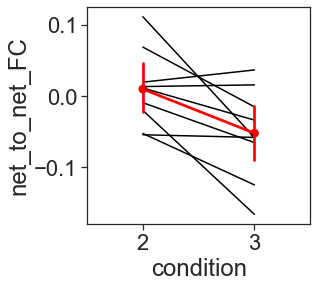

In [171]:
plt.figure(figsize=(4, 4))
sns.set(font_scale=2)
sns.set_style("ticks")
sns.set_palette("viridis",3)
#fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.lineplot(x= 'condition', y='net_to_net_FC',data = fc_z_df[fc_z_df['net1_label']=='Default'][fc_z_df['net2_label']=='Vis'],estimator=None, units = 'subject',color = 'black')

fig2 = sns.pointplot(x= 'condition', y='net_to_net_FC',data = fc_z_df[fc_z_df['net1_label']=='Default'][fc_z_df['net2_label']=='Vis'],color = 'red')




In [773]:
fc_z_df[fc_z_df['net1_label']=='DorsAttn'][fc_z_df['net2_label']=='DorsAttn']

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


subject net1_label net2_label  net_to_net_FC condition   age  \
13        0   DorsAttn   DorsAttn       0.266266         2  63.0   
41        1   DorsAttn   DorsAttn       0.075644         2  72.0   
69        2   DorsAttn   DorsAttn       0.240879         2  82.0   
97        3   DorsAttn   DorsAttn       0.193346         2  67.0   
125       4   DorsAttn   DorsAttn       0.252785         2  67.0   
153       5   DorsAttn   DorsAttn       0.423200         2  67.0   
181       6   DorsAttn   DorsAttn       0.161217         2  68.0   
209       7   DorsAttn   DorsAttn       0.196706         2  61.0   
237       0   DorsAttn   DorsAttn       0.236467         3  63.0   
265       1   DorsAttn   DorsAttn       0.073409         3  72.0   
293       2   DorsAttn   DorsAttn       0.281557         3  82.0   
321       3   DorsAttn   DorsAttn       0.255611         3  67.0   
349       4   DorsAttn   DorsAttn       0.277282         3  67.0   
377       5   DorsAttn   DorsAttn       0.422222         3  67.0   
405       6   DorsAttn   DorsAttn       0.272064         3  68.0   
433       7   DorsAttn   DorsAttn       0.307203         3  61.0   

     duration_implant  
13               4.00  
41              12.10  
69               6.85  
97              13.70  
125              9.30  
153              3.66  
181              2.05  
209              9.75  
237              4.00  
265             12.10  
293              6.85  
321             13.70  
349              9.30  
377              3.66  
405              2.05  
433              9.75

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<AxesSubplot:xlabel='condition', ylabel='net_to_net_FC'>

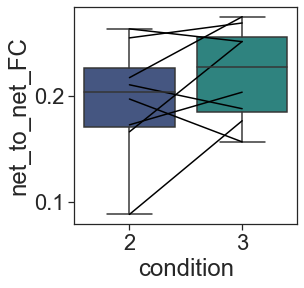

In [731]:
plt.figure(figsize=(4, 4))
sns.set(font_scale=2)
sns.set_style("ticks")
sns.set_palette("viridis",3)
fig2 = sns.boxplot(x= 'condition', y='net_to_net_FC',data = fc_z_df[fc_z_df['net1_label']=='Default'][fc_z_df['net2_label']=='Default'])

#fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.lineplot(x= 'condition', y='net_to_net_FC',data = fc_z_df[fc_z_df['net1_label']=='Default'][fc_z_df['net2_label']=='Default'],estimator=None, units = 'subject',color = 'black')



/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<AxesSubplot:xlabel='condition', ylabel='net_to_net_FC'>

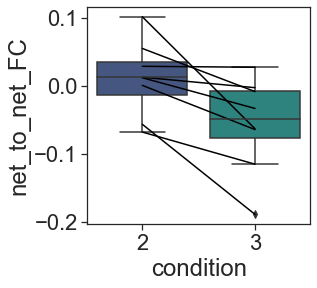

In [647]:
plt.figure(figsize=(4, 4))
sns.set(font_scale=2)
sns.set_style("ticks")
sns.set_palette("viridis",3)
fig2 = sns.boxplot(x= 'condition', y='net_to_net_FC',data = fc_z_df[fc_z_df['net1_label']=='Default'][fc_z_df['net2_label']=='Vis'])

#fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.lineplot(x= 'condition', y='net_to_net_FC',data = fc_z_df[fc_z_df['net1_label']=='Default'][fc_z_df['net2_label']=='Vis'],estimator=None, units = 'subject',color = 'black')



/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<AxesSubplot:xlabel='condition', ylabel='net_to_net_FC'>

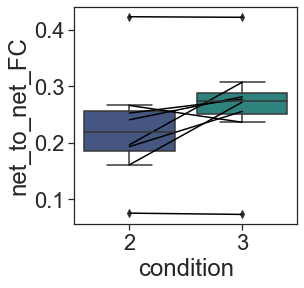

In [650]:
plt.figure(figsize=(4, 4))
sns.set(font_scale=2)
sns.set_style("ticks")
sns.set_palette("viridis",3)
fig2 = sns.boxplot(x= 'condition', y='net_to_net_FC',data = fc_z_df[fc_z_df['net1_label']=='DorsAttn'][fc_z_df['net2_label']=='DorsAttn'])

#fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.lineplot(x= 'condition', y='net_to_net_FC',data = fc_z_df[fc_z_df['net1_label']=='DorsAttn'][fc_z_df['net2_label']=='DorsAttn'],estimator=None, units = 'subject',color = 'black')



/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<AxesSubplot:xlabel='condition', ylabel='net_to_net_FC'>

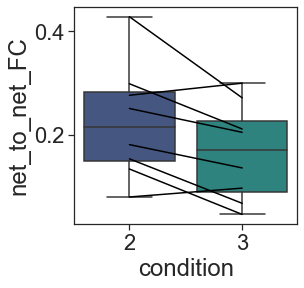

In [680]:
plt.figure(figsize=(4, 4))
sns.set(font_scale=2)
sns.set_style("ticks")
sns.set_palette("viridis",3)
fig2 = sns.boxplot(x= 'condition', y='net_to_net_FC',data = fc_z_df[fc_z_df['net1_label']=='Limbic'][fc_z_df['net2_label']=='Limbic'])

#fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.lineplot(x= 'condition', y='net_to_net_FC',data = fc_z_df[fc_z_df['net1_label']=='Limbic'][fc_z_df['net2_label']=='Limbic'],estimator=None, units = 'subject',color = 'black')



/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<AxesSubplot:xlabel='condition', ylabel='net_to_net_FC'>

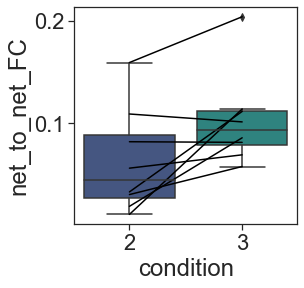

In [670]:
plt.figure(figsize=(4, 4))
sns.set(font_scale=2)
sns.set_style("ticks")
sns.set_palette("viridis",3)
fig2 = sns.boxplot(x= 'condition', y='net_to_net_FC',data = fc_z_df[fc_z_df['net1_label']=='DorsAttn'][fc_z_df['net2_label']=='SalVentAttn'])

#fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.lineplot(x= 'condition', y='net_to_net_FC',data = fc_z_df[fc_z_df['net1_label']=='DorsAttn'][fc_z_df['net2_label']=='SalVentAttn'],estimator=None, units = 'subject',color = 'black')



In [739]:
md = smf.mixedlm("net_to_net_FC~condition+age+duration_implant", 
                 data = fc_z_df[fc_z_df['net1_label']=='DorsAttn'][fc_z_df['net2_label']=='SomMot'],
                 groups = 'subject',
                re_formula='~condition')
mdf = md.fit()
print(mdf.summary())

                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     net_to_net_FC
No. Observations:     16          Method:                 REML         
No. Groups:           8           Scale:                  0.0004       
Min. group size:      2           Log-Likelihood:         16.1825      
Max. group size:      2           Converged:              Yes          
Mean group size:      2.0                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.106    0.202  0.524 0.600 -0.290  0.502
condition[T.3]                0.023    0.009  2.462 0.014  0.005  0.042
age                          -0.000    0.003 -0.047 0.962 -0.006  0.006
duration_implant             -0.002    0.004 -0.453 0.651 -0.010  0.006
subject V

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [317]:
fc_z_df['within_or_between'] = fc_z_df.apply(lambda row: 'within' if row['net1_label'] == row['net2_label'] else 'between', axis=1)

In [318]:
md = smf.mixedlm("net_to_net_FC~within_or_between+duration_implant+age", 
                 data = fc_z_df.loc[fc_z_df['net_to_net_FC']>-10].loc[fc_z_df['condition']=='2'],
                 groups = 'subject')
mdf = md.fit()
print(mdf.summary())

                Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    net_to_net_FC
No. Observations:      223        Method:                REML         
No. Groups:            8          Scale:                 0.0070       
Min. group size:       27         Log-Likelihood:        220.1709     
Max. group size:       28         Converged:             Yes          
Mean group size:       27.9                                           
----------------------------------------------------------------------
                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                    0.094    0.065  1.447 0.148 -0.033  0.220
within_or_between[T.within]  0.218    0.013 16.853 0.000  0.193  0.244
duration_implant            -0.003    0.001 -1.862 0.063 -0.005  0.000
age                         -0.001    0.001 -0.720 0.472 -0.002  0.001
subject Var            

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [319]:
md = smf.mixedlm("net_to_net_FC~within_or_between+duration_implant+age", 
                 data = fc_z_df.loc[fc_z_df['net_to_net_FC']>-10].loc[fc_z_df['condition']=='3'],
                 groups = 'subject')
mdf = md.fit()
print(mdf.summary())

                Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    net_to_net_FC
No. Observations:      223        Method:                REML         
No. Groups:            8          Scale:                 0.0092       
Min. group size:       27         Log-Likelihood:        189.0535     
Max. group size:       28         Converged:             Yes          
Mean group size:       27.9                                           
----------------------------------------------------------------------
                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                    0.060    0.079  0.760 0.447 -0.095  0.215
within_or_between[T.within]  0.230    0.015 15.408 0.000  0.201  0.259
duration_implant            -0.002    0.002 -0.895 0.371 -0.005  0.002
age                         -0.000    0.001 -0.305 0.760 -0.003  0.002
subject Var            

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


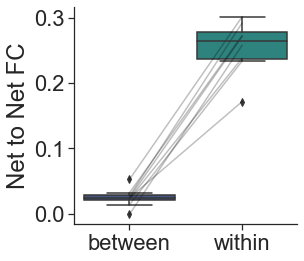

In [325]:
plt.figure(figsize=(4, 4))
sns.set(font_scale=2)
sns.set_style("ticks")
sns.set_palette("viridis",3)
fig2 = sns.boxplot(x= 'within_or_between', y='net_to_net_FC'
                   ,data = fc_z_df.loc[fc_z_df['net_to_net_FC']>-10].loc[fc_z_df['condition']=='3'].groupby(['within_or_between','subject'])['net_to_net_FC'].mean().reset_index())

#fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.lineplot(x= 'within_or_between', y='net_to_net_FC',
             data = fc_z_df.loc[fc_z_df['net_to_net_FC']>-10].loc[fc_z_df['condition']=='3'].groupby(['within_or_between','subject'])['net_to_net_FC'].mean().reset_index(),
             estimator=None,
             units = 'subject',
             color = 'black',
            alpha = .25)

# Change the axis labels
plt.gca().set_ylabel('Net to Net FC')
plt.gca().set_xlabel('')
sns.despine()

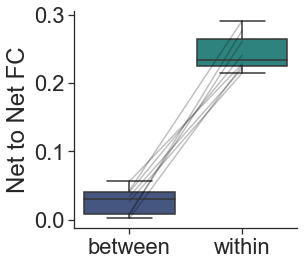

In [324]:
plt.figure(figsize=(4, 4))
sns.set(font_scale=2)
sns.set_style("ticks")
sns.set_palette("viridis",3)
fig2 = sns.boxplot(x= 'within_or_between', y='net_to_net_FC'
                   ,data = fc_z_df.loc[fc_z_df['net_to_net_FC']>-10].loc[fc_z_df['condition']=='2'].groupby(['within_or_between','subject'])['net_to_net_FC'].mean().reset_index())

#fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.lineplot(x= 'within_or_between', y='net_to_net_FC',
             data = fc_z_df.loc[fc_z_df['net_to_net_FC']>-10].loc[fc_z_df['condition']=='2'].groupby(['within_or_between','subject'])['net_to_net_FC'].mean().reset_index(),
             estimator=None,
             units = 'subject',
             color = 'black',
            alpha = .25)

# Change the axis labels
plt.gca().set_ylabel('Net to Net FC')
plt.gca().set_xlabel('')
sns.despine()